In [1]:
''' 
   Residuls : Difference between the actual value of Y and its predicted value for observation in the sample
   
   Forecast error : Differece between the future value of Y, which is not contained in the estimation sample,
   and the forecast of the future value.
   
   Fitted Value : The fitted function returns the y-hat values associated with the data used to fit the model
   
   Predicted Value : The predict function returns predictions for a new set of predictore variables
   
'''

' \n   Residuls : Difference between the actual value of Y and its predicted value for observation in the sample\n   \n   Forecast error : Differece between the future value of Y, which is not contained in the estimation sample,\n   and the forecast of the future value.\n   \n   Fitted Value : The fitted function returns the y-hat values associated with the data used to fit the model\n   \n   Predicted Value : The predict function returns predictions for a new set of predictore variables\n   \n'

In [2]:
# Fitted values are also called as predicted values

''' install pmdarima 

    pip install pmdarima'''

' install pmdarima \n\n    pip install pmdarima'

In [3]:
''' Create Sarimax model with out PACF, ACF and ADF test '''  

# Import Libraries

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os
from sklearn.metrics import r2_score
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
import warnings
warnings.filterwarnings('ignore')

In [4]:
os.getcwd()

'c:\\Users\\HP\\Desktop\\Deep Learning with Prajwal'

In [5]:
# Read Data - Covert Data to Index columns

os.chdir('C:\\Users\\HP\\Downloads\\Batch 93 Day39\\')

In [6]:
df=pd.read_csv('monthly-milk-production.csv',index_col='Month',parse_dates=True)
display(df)

,Milk Production
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0
...,...
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0


In [7]:
# Display the Data Type

display(df.dtypes)

Milk Production    float64
dtype: object

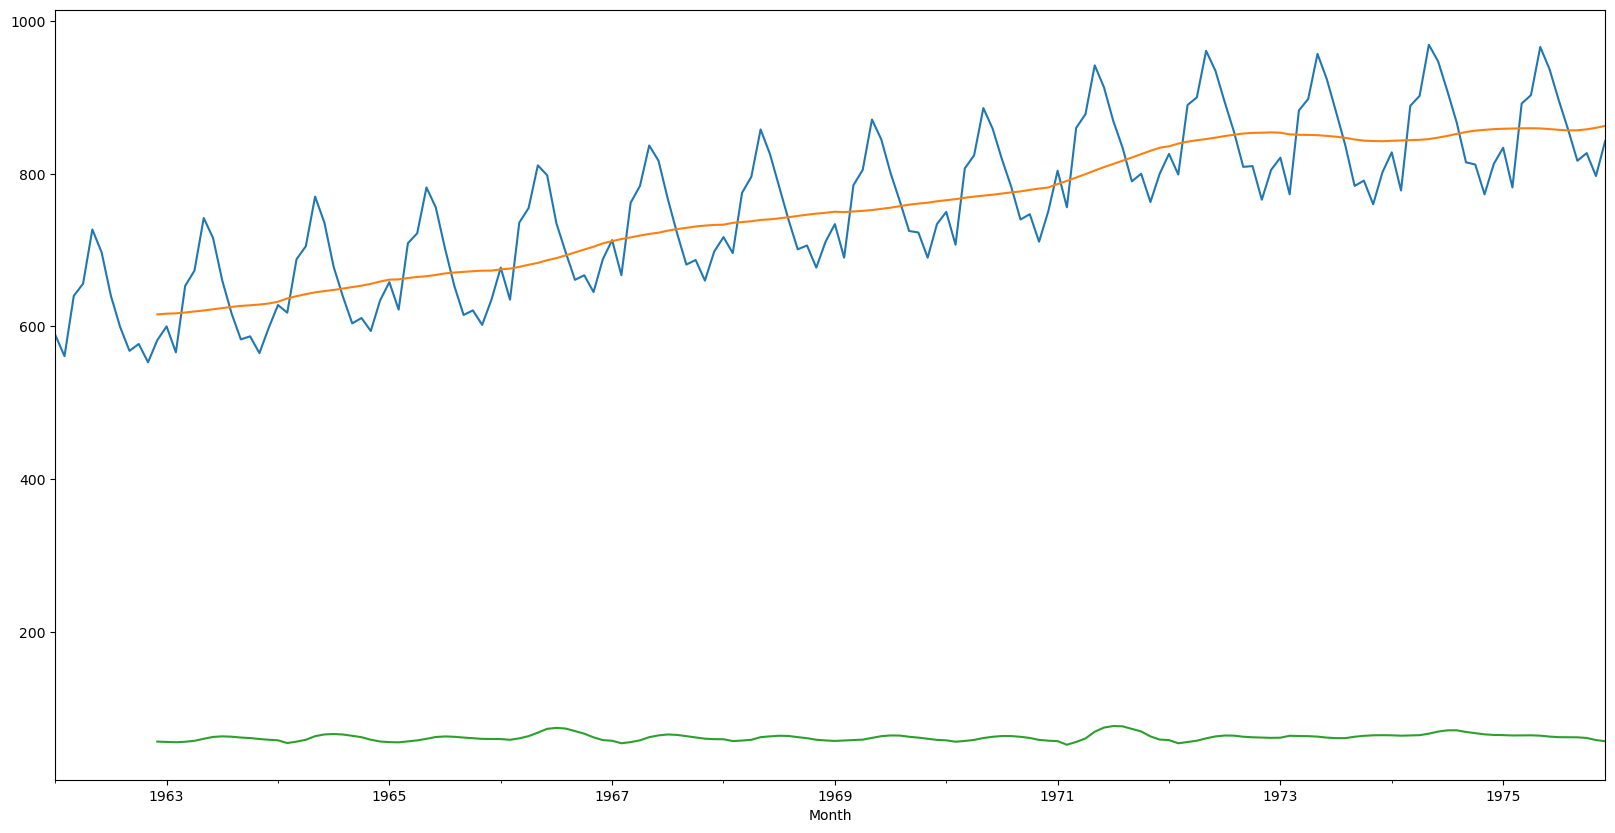

In [8]:
# Plot graph with Mean and STD

df['Milk Production'].plot()
df['Milk Production'].rolling(12).mean().plot()
df['Milk Production'].rolling(12).std().plot()
plt.show()

<Figure size 2000x1000 with 0 Axes>

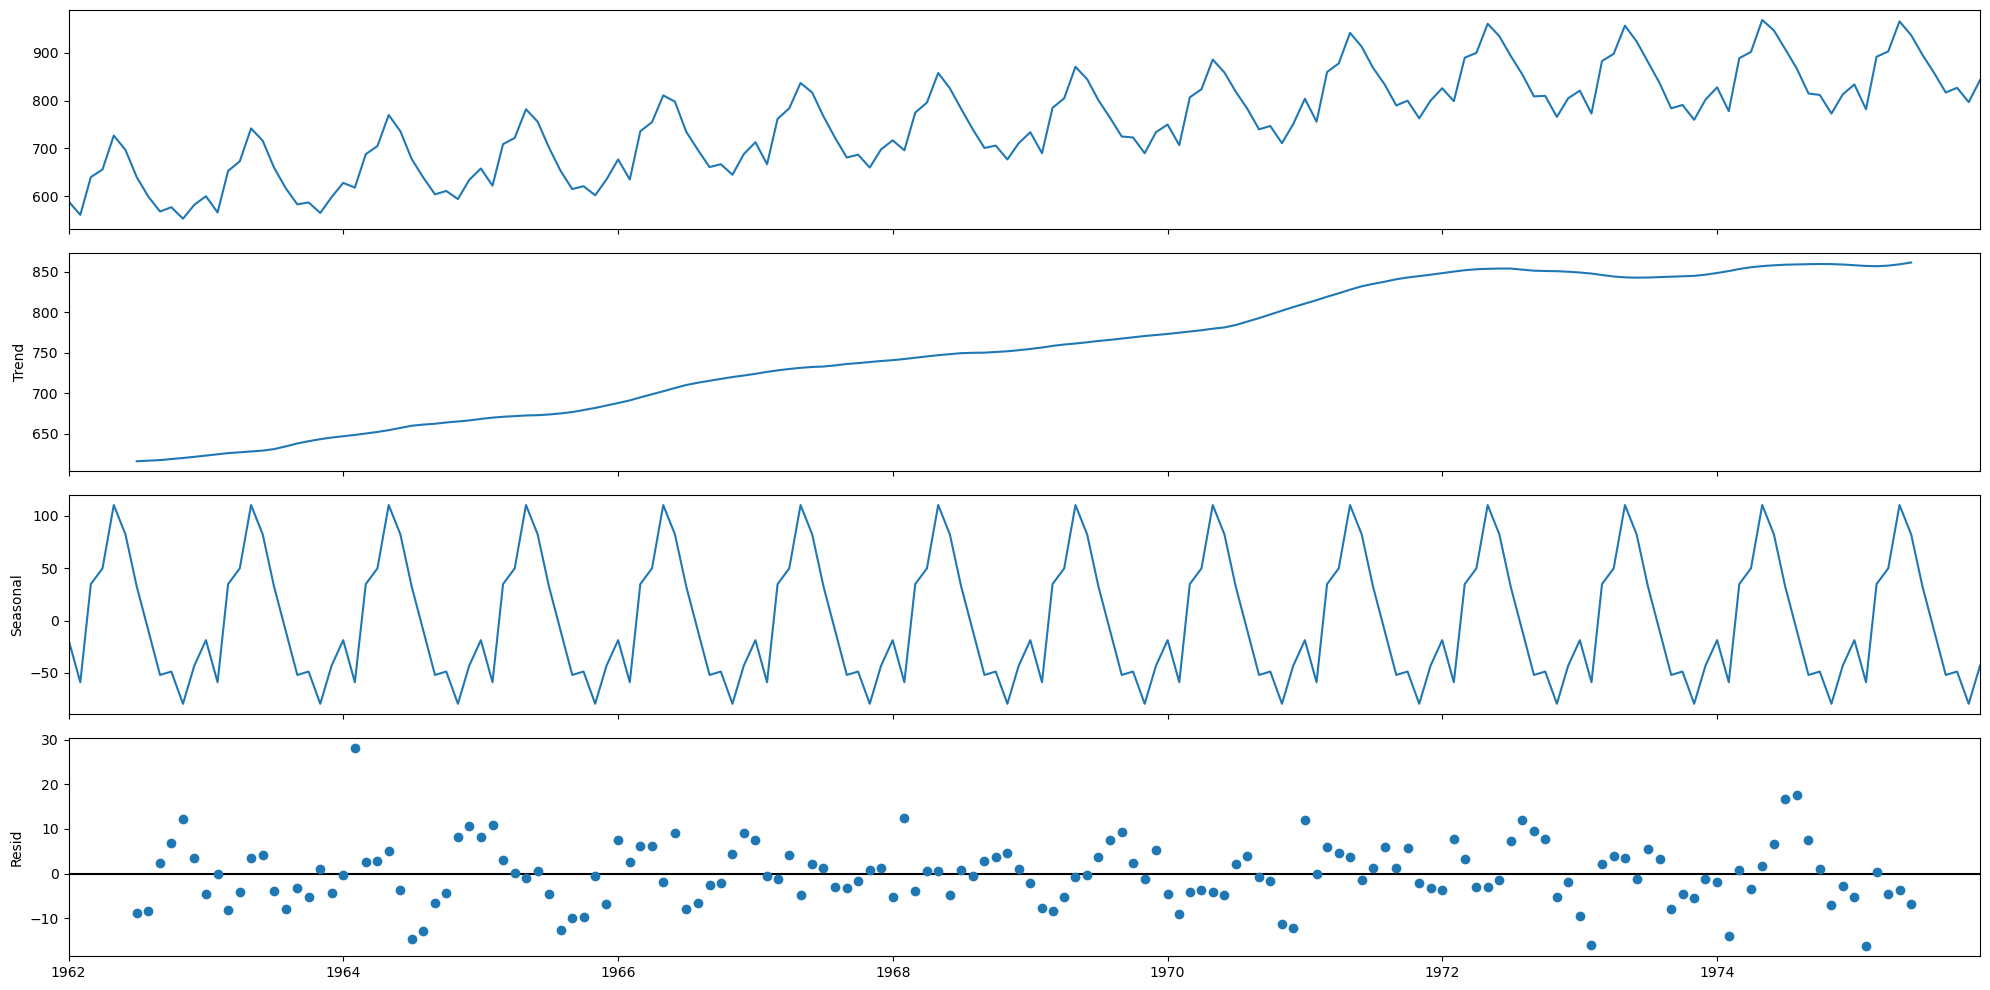

In [9]:
# Seasonal Decompose

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(df,period=12)
fig=plt.figure()
fig=decomposition.plot()
plt.show()

In [10]:
# Find P,D,Q Values including seasonal P,D,Q
# m is one cycle ie 12 months , D=1 number of shifts

In [11]:
from pmdarima import auto_arima
auto_arima(df,m=12,trace=True,D=1).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=1076.442, Time=1.69 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1324.708, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1092.340, Time=0.32 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1211.922, Time=0.45 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1452.434, Time=0.06 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=1074.582, Time=0.99 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=1119.880, Time=0.42 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=1076.422, Time=2.47 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=1089.179, Time=0.97 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=3.77 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=1073.351, Time=0.65 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=1119.515, Time=0.23 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=1075.202, Time=1.00 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=1075.178, Time=1.16 sec
 ARIMA(1,0,2)(1,1,0)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  168
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -531.033
Date:                              Sun, 14 Jul 2024   AIC                           1072.066
Time:                                      18:38:16   BIC                           1087.315
Sample:                                  01-01-1962   HQIC                          1078.260
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6062      0.905      1.775      0.076      -0.168       3.380
ar.L1          0.7310      0.084      8.737      0.000       0.567       0.895
ar.L2          0.1887      0.080      2.355      0.019       0.032       0.346
ma.S.L12      -0.6166      0.073     -8.403      0.000      -0.760      -0.473
sigma2        50.7122      4.915     10.317      0.000      41.078      60.346
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                42.72
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.83   Skew:                             0.78
Prob(H) (two-sided):                  0.52   Kurtosis:                         5.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
# Display the shape

display(df.shape)

(168, 1)

In [13]:
# Train Test Split

train=df.iloc[:150]
test=df.iloc[150:]

In [14]:
# Create SARIMAX model 
from statsmodels.tsa.statespace.sarimax import SARIMAX
Model=SARIMAX(train,order=(2,0,0),seasonal_oder=(0,1,1,12) )
Model=Model.fit()

In [15]:
# Prediction of the Tests Data Set

prediction = Model.predict(len(train), len(train)+len(test)-1, typ='levels')
display(prediction)

1974-07-01    944.729789
1974-08-01    943.027232
1974-09-01    941.343846
1974-10-01    939.663926
1974-11-01    937.987017
1974-12-01    936.313101
1975-01-01    934.642172
1975-02-01    932.974225
1975-03-01    931.309255
1975-04-01    929.647256
1975-05-01    927.988223
1975-06-01    926.332151
1975-07-01    924.679034
1975-08-01    923.028867
1975-09-01    921.381645
1975-10-01    919.737363
1975-11-01    918.096015
1975-12-01    916.457596
Freq: MS, Name: predicted_mean, dtype: float64

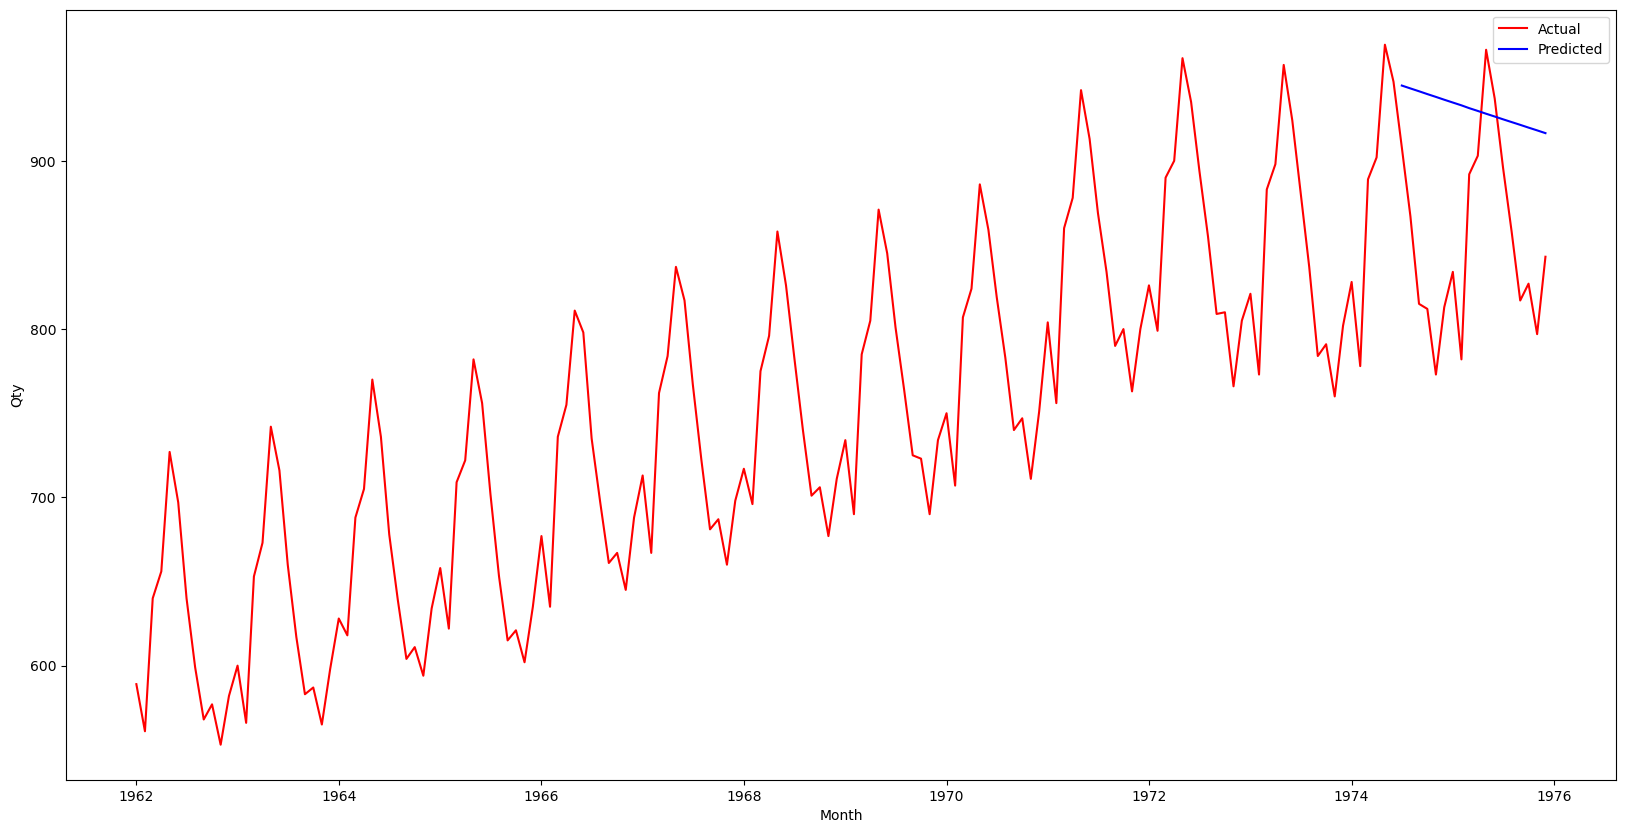

In [16]:
# Plot Graph

plt.plot(df,color='red',label='Actual')
plt.plot(prediction,color='blue',label='Predicted')
plt.xlabel('Month')
plt.ylabel('Qty')
plt.legend()
plt.show()

In [17]:
# Accuracy of test data
print('Accuracy',r2_score(test,prediction))

Accuracy -2.2203660744324294


Accuracy 0.4289116726867318


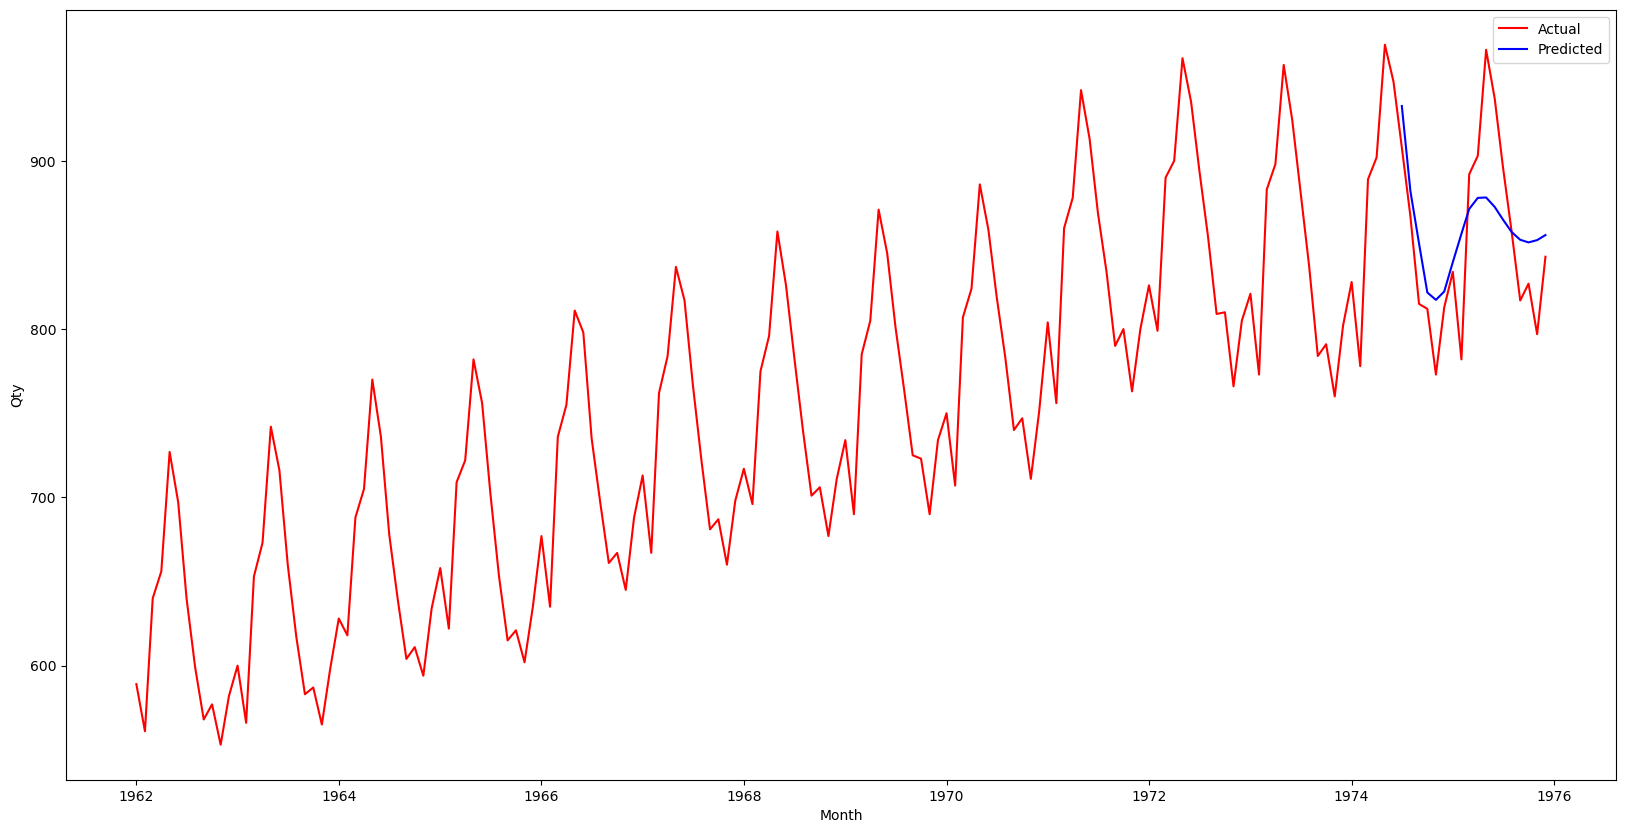

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
Model=SARIMAX(train,order=(3,1,1),seasonal_oder=(1,1,1,12) )
Model=Model.fit()
prediction = Model.predict(len(train), len(train)+len(test)-1, typ='levels')
print('Accuracy',r2_score(test,prediction))
plt.plot(df,color='red',label='Actual')
plt.plot(prediction,color='blue',label='Predicted')
plt.xlabel('Month')
plt.ylabel('Qty')
plt.legend()
plt.show()